# Box Plot

This section showcases the box plot. It contains examples of how to create the box plot using the [datachart.charts.BoxPlot](/references/charts#datachart.charts.BoxPlot) function.

The examples sequentially build on each other, going from simple to complex.

As mentioned above, the box plots are created using the `BoxPlot` function found in the [datachart.charts](datachart.charts) module. Let's import it:


In [1]:
from datachart.charts import BoxPlot

<div class="admonition note">
    <p class="admonition-title">Double figure generation avoidence</p>
    <p style="margin-top: .6rem; margin-bottom: .6rem">
        To avoid double figure generation, the <code>BoxPlot</code> function is preceded by the <code>_ =</code> operator. The double figures are generated because <code>BoxPlot</code> returns the <code>plt.Figure</code> object, which is then used to save the figure locally.
    </p>
</div>

## Box Plot Input Attributes

The `BoxPlot` function accepts keyword arguments for chart configuration. The main argument is `data`, which contains the data points. For a single box plot, `data` is a list of dictionaries. For multiple box plots, `data` is a list of lists.

```python
BoxPlot(
    data=[{                                             # A list of box data points (or list of lists for multiple charts)
        "label": str,                                   # The category label
        "value": Union[int, float],                     # The numeric value
    }],
    style={                                             # The style of the box (optional)
        "plot_box_color":           Union[str, None],       # The fill color of the box
        "plot_box_alpha":           Union[float, None],     # The alpha of the box
        "plot_box_linewidth":       Union[int, float, None], # The line width of the box
        "plot_box_edgecolor":       Union[str, None],       # The edge color of the box
        "plot_box_outlier_marker":  Union[str, None],       # The outlier marker style
        "plot_box_outlier_size":    Union[int, float, None], # The outlier marker size
        "plot_box_outlier_color":   Union[str, None],       # The outlier marker color
        "plot_box_median_color":    Union[str, None],       # The median line color
        "plot_box_median_linewidth": Union[int, float, None], # The median line width
        "plot_box_whisker_linewidth": Union[int, float, None], # The whisker line width
        "plot_box_cap_linewidth":   Union[int, float, None], # The cap line width
    },
    subtitle=Optional[str],                             # The subtitle of the chart (or list for multiple charts)
    title=Optional[str],                                # The title of the chart
    xlabel=Optional[str],                               # The x-axis label
    ylabel=Optional[str],                               # The y-axis label

    show_outliers=Optional[bool],                       # Whether to show outliers (default: True)
    show_notch=Optional[bool],                          # Whether to show notched boxes (default: False)
    orientation=Optional[ORIENTATION],                  # The orientation of the boxes

    xticks=Optional[List[Union[int, float]]],           # the x-axis ticks
    xticklabels=Optional[List[str]],                    # the x-axis tick labels (must be same length as xticks)
    xtickrotate=Optional[int],                          # the x-axis tick labels rotation
    yticks=Optional[List[Union[int, float]]],           # the y-axis ticks
    yticklabels=Optional[List[str]],                    # the y-axis tick labels (must be same length as yticks)
    ytickrotate=Optional[int],                          # the y-axis tick labels rotation

    vlines=Optional[Union[dict, List[dict]]],           # the vertical lines
    hlines=Optional[Union[dict, List[dict]]],           # the horizontal lines
)
```

For more details, see the [datachart.typings.BoxChartAttrs](/references/typings/#datachart.typings.BoxChartAttrs) type.

## Single Box Plot

In this part, we show how to create a single box plot using the `BoxPlot` function. 

Let us first import the necessary libraries:

In [2]:
import random

**Basic example.** Let us first create a basic box plot showing random distributions across categories.

The following example shows how only the `data` argument is required to draw the box plot. Note that multiple data points with the same `label` are grouped together to form a single box.

In [3]:
NUM_OF_CATEGORIES = 5
NUM_OF_POINTS_PER_CATEGORY = 50

In [4]:
chart_data = [
    {"label": f"Group {chr(65 + cat_id)}", "value": random.gauss(50 + cat_id * 10, 15)}
    for cat_id in range(NUM_OF_CATEGORIES)
    for _ in range(NUM_OF_POINTS_PER_CATEGORY)
]

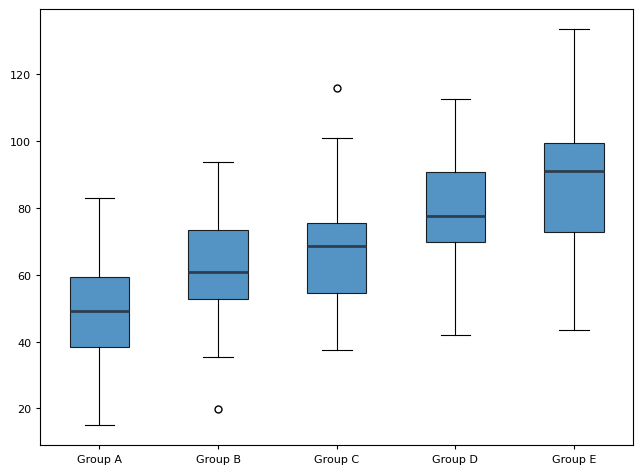

In [5]:
_ = BoxPlot(
    # add the data to the chart
    data=chart_data
)

### Chart title and axis labels

To add the chart title and axis labels, simply add the `title`, `xlabel` and `ylabel` attributes.

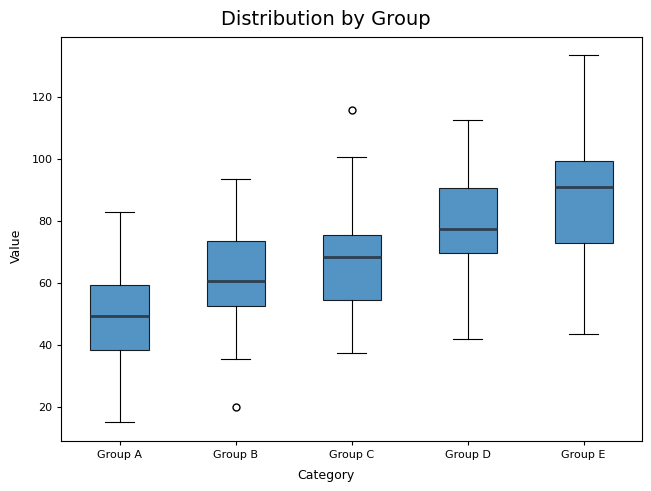

In [6]:
_ = BoxPlot(
    data=chart_data,
    # add the title
    title="Distribution by Group",
    # add the x and y axis labels
    xlabel="Category",
    ylabel="Value"
)

### Figure size and grid

To change the figure size, simply add the `figsize` attribute. The `figsize` attribute can be a tuple (width, height), values are in inches. The `datachart` package provides a [datachart.constants.FIG_SIZE](/references/constants/#datachart.constants.FIG_SIZE) constant, which contains some of the predefined figure sizes.

To add the grid, simply add the `show_grid` attribute. The possible options are:

| Option | Description |
| --- | --- |
| `"both"` | shows both the x-axis and the y-axis gridlines. |
| `"x"` | shows only the x-axis grid lines. |
| `"y"` | shows only the y-axis grid lines. |

Again, `datachart` provides a [datachart.constants.SHOW_GRID](/references/constants/#datachart.constants.SHOW_GRID) constant, which contains the supported options.

In [7]:
from datachart.constants import FIG_SIZE, SHOW_GRID

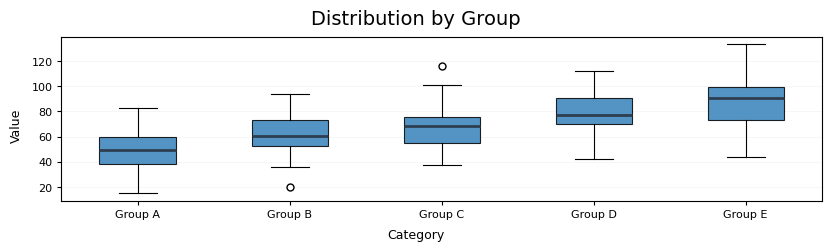

In [8]:
_ = BoxPlot(
    data=chart_data,
    title="Distribution by Group",
    xlabel="Category",
    ylabel="Value",
    # add to determine the figure size
    figsize=FIG_SIZE.A4_NARROW,
    # add to show the grid lines
    show_grid=SHOW_GRID.Y
)

### Box style

To change the box style simply add the `style` attribute with the corresponding attributes. The supported attributes are shown in the [datachart.typings.BoxStyleAttrs](/references/typings/#datachart.typings.BoxStyleAttrs) type, which contains the following attributes:

| Attribute | Description |
| :-------- | :---------- |
| `"plot_box_color"`           | The fill color of the box (hex color code). |
| `"plot_box_alpha"`           | The alpha of the box (how visible the box is). |
| `"plot_box_linewidth"`       | The line width of the box border. |
| `"plot_box_edgecolor"`       | The edge color of the box (hex color code). |
| `"plot_box_outlier_marker"` | The outlier marker style. |
| `"plot_box_outlier_size"`   | The outlier marker size. |
| `"plot_box_outlier_color"`  | The outlier marker color (hex color code). |
| `"plot_box_median_color"`   | The median line color (hex color code). |
| `"plot_box_median_linewidth"` | The median line width. |
| `"plot_box_whisker_linewidth"` | The whisker line width. |
| `"plot_box_cap_linewidth"`   | The cap line width. |

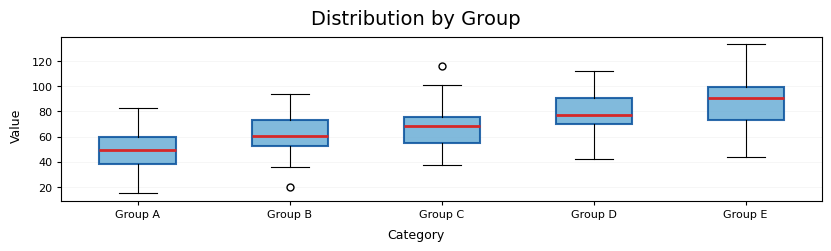

In [9]:
_ = BoxPlot(
    data=chart_data,
    # define the style of the boxes
    style={
        "plot_box_color": "#6baed6",
        "plot_box_edgecolor": "#08519c",
        "plot_box_linewidth": 1.5,
        "plot_box_median_color": "#d62728",
        "plot_box_median_linewidth": 2,
    },
    title="Distribution by Group",
    xlabel="Category",
    ylabel="Value",
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.Y,
)

### Box orientation

To change the orientation of the boxes, simply add the `orientation` attribute, which supports the following values:

| Value | Description |
| :---- | :---------- |
| `"horizontal"` | The boxes are horizontal. |
| `"vertical"` | The boxes are vertical. |

Again, to help with the style settings, the [datachart.constants](/references/constants/) module contains the following constants:

| Constant | Description |
| :------- | :---------- |
| [datachart.constants.ORIENTATION](/references/constants/#datachart.constants.ORIENTATION) | The orientation of the boxes. |

In [10]:
from datachart.constants import ORIENTATION

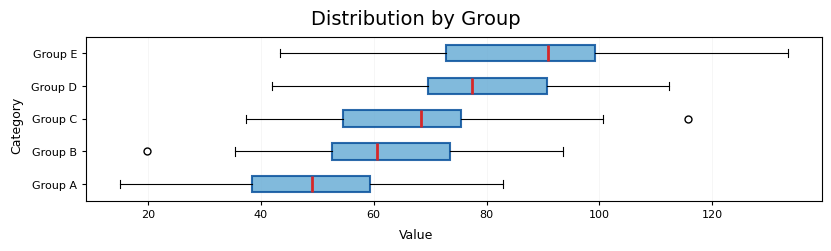

In [11]:
_ = BoxPlot(
    data=chart_data,
    style={
        "plot_box_color": "#6baed6",
        "plot_box_edgecolor": "#08519c",
        "plot_box_linewidth": 1.5,
        "plot_box_median_color": "#d62728",
        "plot_box_median_linewidth": 2,
    },
    title="Distribution by Group",
    xlabel="Value",
    ylabel="Category",
    figsize=FIG_SIZE.A4_NARROW,
    # change the grid to match the change in orientation
    show_grid=SHOW_GRID.X,
    # change the orientation of the boxes
    orientation=ORIENTATION.HORIZONTAL,
)

### Showing and hiding outliers

By default, outliers are shown in the box plot. To hide them, set `show_outliers=False`.

In [12]:
# Create data with some outliers
chart_data_with_outliers = chart_data + [
    {"label": "Group A", "value": 150},
    {"label": "Group A", "value": -20},
    {"label": "Group C", "value": 180},
]

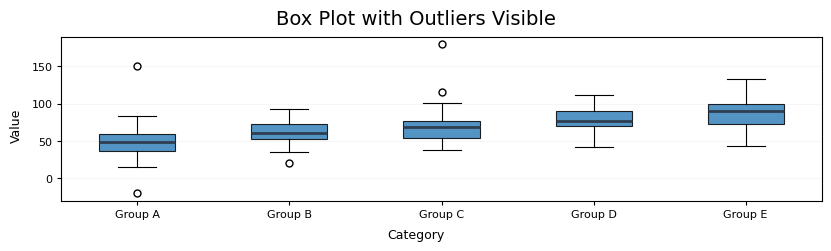

In [13]:
_ = BoxPlot(
    data=chart_data_with_outliers,
    title="Box Plot with Outliers Visible",
    xlabel="Category",
    ylabel="Value",
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.Y,
    # show outliers (default behavior)
    show_outliers=True,
)

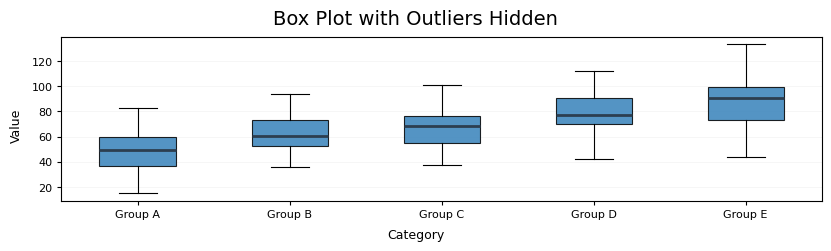

In [14]:
_ = BoxPlot(
    data=chart_data_with_outliers,
    title="Box Plot with Outliers Hidden",
    xlabel="Category",
    ylabel="Value",
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.Y,
    # hide outliers
    show_outliers=False,
)

### Notched box plots

Notched box plots show a confidence interval around the median. If the notches of two boxes don't overlap, there is evidence that their medians differ. Enable notches with `show_notch=True`.

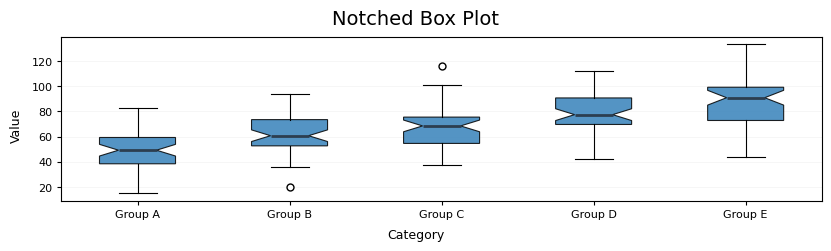

In [15]:
_ = BoxPlot(
    data=chart_data,
    title="Notched Box Plot",
    xlabel="Category",
    ylabel="Value",
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.Y,
    # show notched boxes
    show_notch=True,
)

### Adding vertical and horizontal lines

**Adding horizontal lines.** Use the `hlines` argument with the [datachart.typings.HLinePlotAttrs](/references/typings/#datachart.typings.HLinePlotAttrs) typing, which is either a `dict` or a `List[dict]` where each dictionary contains some of the following attributes:

```python
{
  "y":    Union[int, float],                 # The y-axis value
  "xmin": Optional[Union[int, float]],       # The minimum x-axis value
  "xmax": Optional[Union[int, float]],       # The maximum x-axis value
  "style": {                                 # The style of the line (optional)
    "plot_hline_color": Optional[str],       # The color of the line (hex color code)
    "plot_hline_style": Optional[LineStyle], # The line style (solid, dashed, etc.)
    "plot_hline_width": Optional[float],     # The width of the line
    "plot_hline_alpha": Optional[float],     # The alpha of the line (how visible the line is)
  },
  "label": Optional[str],                    # The label of the line
}
```

This is useful for adding reference lines such as thresholds or averages.

In [16]:
from datachart.constants import LINE_STYLE

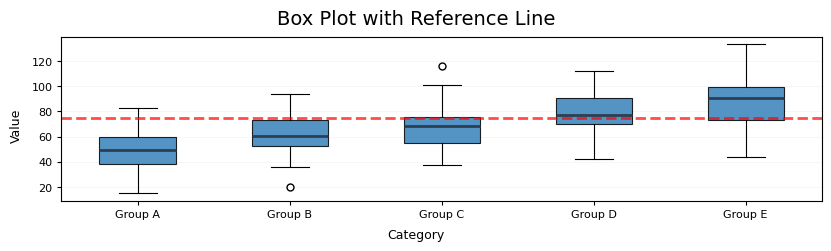

In [17]:
_ = BoxPlot(
    data=chart_data,
    # add a horizontal line (e.g., a threshold or mean)
    hlines={
        "y": 75,
        "style": {
            "plot_hline_color": "red",
            "plot_hline_style": LINE_STYLE.DASHED,
            "plot_hline_width": 2,
            "plot_hline_alpha": 0.7,
        },
    },
    title="Box Plot with Reference Line",
    xlabel="Category",
    ylabel="Value",
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.Y,
)

## Multiple Box Plots

To create multiple box plots, pass a list of lists to the `data` argument. Each inner list represents the data for one chart. Per-chart attributes like `subtitle` and `style` can be passed as lists, where each element corresponds to a chart.

<div class="admonition warning">
    <p class="admonition-title">Subplots required for multiple datasets</p>
    <p style="margin-top: .6rem; margin-bottom: .6rem">
        When using multiple datasets (list of lists), you <strong>must</strong> set <code>subplots=True</code>. Box plots do not support overlaying multiple datasets on a single axis.
    </p>
</div>

In [18]:
# the data is now a list of lists (one per chart)
multi_chart_data = [
    [
        {"label": f"Cat {chr(65 + cat_id)}", "value": random.gauss(50 + cat_id * 10, 15)}
        for cat_id in range(4)
        for _ in range(30)
    ]
    for _ in range(2)
]

In [19]:
# define subtitles for each chart
chart_subtitles = [f"Dataset {idx+1}" for idx in range(len(multi_chart_data))]

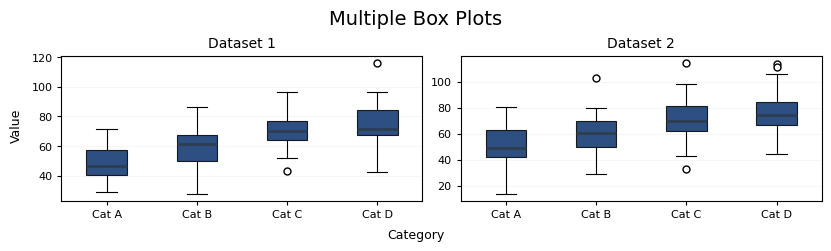

In [20]:
_ = BoxPlot(
    data=multi_chart_data,
    # add a subtitle to each chart
    subtitle=chart_subtitles,
    title="Multiple Box Plots",
    xlabel="Category",
    ylabel="Value",
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.Y,
    subplots=True,
)

### Subplots

As shown above, when using multiple datasets, `subplots=True` is required. Each chart is drawn in its own subplot. The chart's `subtitle` are then added at the top of each subplot, while the `title`, `xlabel` and `ylabel` are positioned to be global for all charts.

### Sharing the x-axis and/or y-axis across subplots

To share the x-axis and/or y-axis across subplots, simply add the `sharex` and/or `sharey` attributes, which are boolean values that specify whether to share the axis across all subplots.

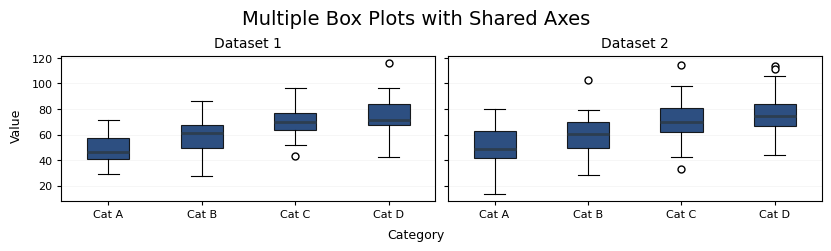

In [21]:
_ = BoxPlot(
    data=multi_chart_data,
    subtitle=chart_subtitles,
    title="Multiple Box Plots with Shared Axes",
    xlabel="Category",
    ylabel="Value",
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.Y,
    subplots=True,
    # share the x-axis across subplots
    sharex=True,
    # share the y-axis across subplots
    sharey=True,
)

### Subplot orientation

The `orientation` attribute can be used to change the orientation of all subplots.

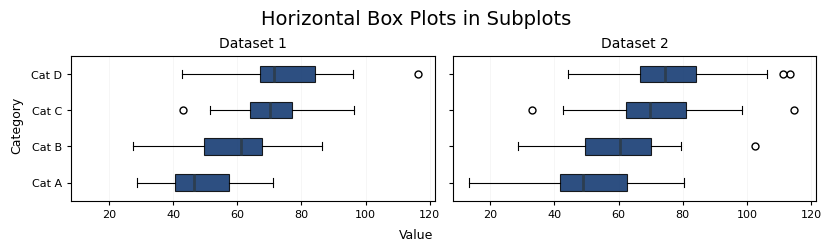

In [22]:
_ = BoxPlot(
    data=multi_chart_data,
    subtitle=chart_subtitles,
    title="Horizontal Box Plots in Subplots",
    xlabel="Value",
    ylabel="Category",
    figsize=FIG_SIZE.A4_NARROW,
    subplots=True,
    sharex=True,
    sharey=True,
    # change the grid to match the change in orientation
    show_grid=SHOW_GRID.X,
    # change the orientation of the boxes
    orientation=ORIENTATION.HORIZONTAL,
)

## Saving the Chart as an Image

To save the chart as an image, use the [datachart.utils.save_figure](/references/utils#datachart.utils.save_figure) function.

In [23]:
from datachart.utils import save_figure

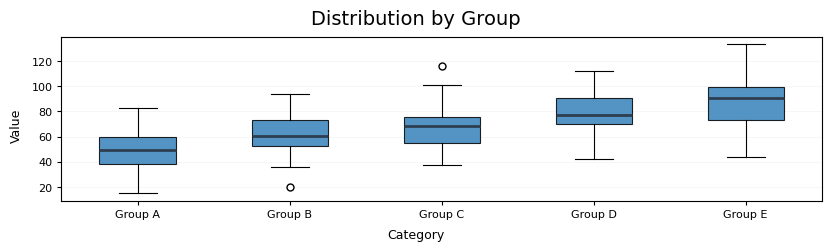

In [24]:
figure = BoxPlot(
    data=chart_data,
    title="Distribution by Group",
    xlabel="Category",
    ylabel="Value",
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.Y,
)

In [25]:
save_figure(figure, "./fig_box_plot.png", dpi=300)

The figure should be saved in the current working directory.